In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/course_1939/datasets/gm_2008_region.csv')

In [3]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [4]:
y = df['life'].values.reshape(-1,1)
X = df['fertility'].values.reshape(-1,1)

In [5]:
y.shape

(139, 1)

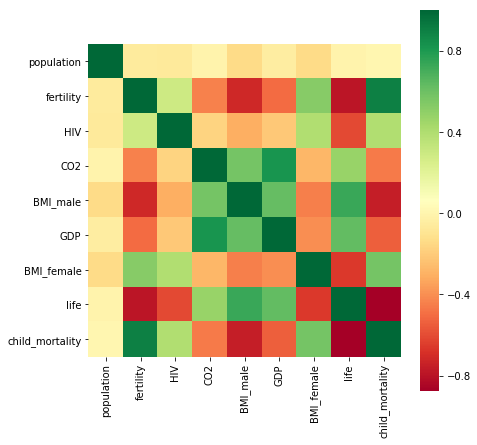

In [6]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),square=True,cmap='RdYlGn')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
prediction_space = np.linspace(min(X),max(X)).reshape(-1,1)

In [10]:
y_pred = reg.predict(prediction_space)
R2 = reg.score(X,y)
print('R2 value : {}'.format(R2))

R2 value : 0.6192442167740035


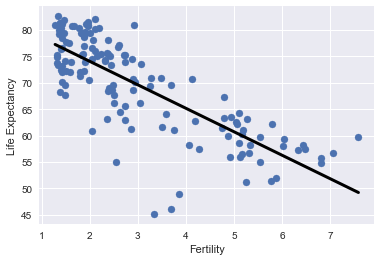

In [11]:
#plt.figure()
sns.set()
plt.scatter(X,y)
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.plot(prediction_space, y_pred, color='black',linewidth=3)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
X_feature = df.drop(['life','Region'],axis=1).values
y_target = df['life'].values

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_feature,y_target,test_size=0.3,random_state=42)

In [15]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [16]:
print('R2 value : {}'.format(reg.score(X_test,y_test)))
RMSE = np.sqrt(mean_squared_error(y_pred,y_test))
print('Mean Squared error : {}'.format(RMSE))

R2 value : 0.8380468731430055
Mean Squared error : 3.247601080037026


In [17]:
##cross validation

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cv_score = cross_val_score(reg,X_feature,y_target,cv=5)
print('cv_score for 5 fold cross validation : {}'.format(cv_score))
print('Average 5 fold cv_score : {}'.format(np.mean(cv_score)))

cv_score for 5 fold cross validation : [0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5 fold cv_score : 0.8599627722793421


In [20]:
from sklearn.linear_model import Lasso

In [21]:
lasso = Lasso(alpha=0.1,normalize=True)
lasso.fit(X_feature,y_target)
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.00000000e+00 -0.00000000e+00 -4.12129267e-01  0.00000000e+00
  1.44155041e-01  5.49253471e-05 -1.61698111e-01 -1.05840073e-01]


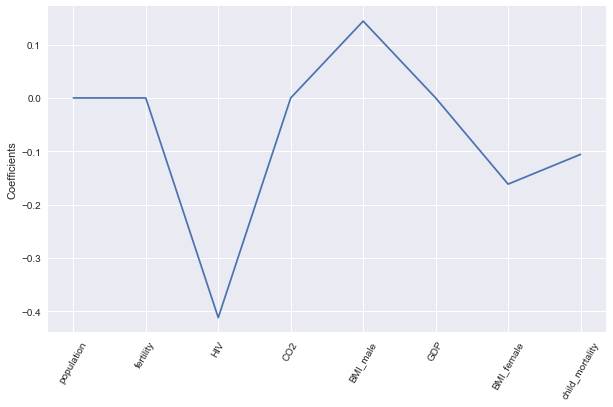

In [22]:
col_names = df.drop(['life','Region'],axis=1).columns.values
plt.figure(figsize=(10,6))
plt.plot(range(len(lasso_coef)),lasso_coef)
plt.xticks(range(len(lasso_coef)),col_names,rotation=60)
plt.ylabel('Coefficients')
plt.show()

In [24]:
from sklearn.linear_model import Ridge

In [28]:
alpha_space = np.logspace(-4,0,50)
ridge_score = []
ridge_score_std_error = []

In [29]:
ridge = Ridge(normalize=True)

for alpha in alpha_space:
    ridge.alpha = alpha
    residual_score = cross_val_score(ridge,X_feature,y_target,cv=10)
    ridge_score.append(np.mean(residual_score))
    ridge_score_std_error.append(np.std(residual_score))

In [46]:
def display_plot(ridge_score,ridge_score_std_error):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space,ridge_score)
    std_error = ridge_score_std_error /np.sqrt(10)
    ax.fill_between(alpha_space,ridge_score + std_error,ridge_score - std_error,alpha=0.2)
    ax.axhline(np.max(ridge_score),linestyle='--',color='.5')
    ax.set_xlim([alpha_space[0],alpha_space[-1]])
    ax.set_xscale('log')
    ax.set_xlabel('alpha')
    ax.set_ylabel('R2 +/- std error')
    plt.show()

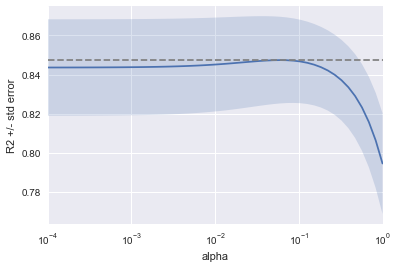

In [47]:
display_plot(ridge_score,ridge_score_std_error)